## Predecting Stock Trend and Prices by using ARIMA and Fourier

**We will explore the use of ARIMA and Fourier Transforms as features in deep learning way to predect the stock markets**

In [1]:
pip install pmdarima

   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
   ------- -------------------------------- 112.6/613.3 kB 6.4 MB/s eta 0:00:01
   ------- -------------------------------- 112.6/613.3 kB 6.4 MB/s eta 0:00:01
   ------- -------------------------------- 112.6/613.3 kB 6.4 MB/s eta 0:00:01
   ------- -------------------------------- 112.6/613.3 kB 6.4 MB/s eta 0:00:01
   ------- ------------------------------ 122.9/613.3 kB 552.2 kB/s eta 0:00:01
   --------------- ------------------------ 235.5/613.3 kB 1.0 MB/s eta 0:00:01
   ------------------------- -------------- 389.1/613.3 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 450.6/613.3 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 450.6/613.3 kB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 450.6/613.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  604.2/613.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 613.3

In [2]:
pip install keras

In [3]:
pip install tenserflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [29]:
# The necessaries packages
import yfinance as yf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


In [34]:
'''
 Importing the data base in this case we will take as an example 
 a database of NVDA Markets with a specific date
'''
stocks = ["NVDA"]
df = yf.download(stocks , start="2022-03-11" , end = "2024-03-11")
df.head(-1) # Display all lines except the last one

c:\Users\BUNICE\AppData\Local\Programs\Python\Python310\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-11,230.220001,231.449997,220.460007,221.000000,220.722870,36720900
2022-03-14,218.690002,222.619995,211.589996,213.300003,213.032516,38535400
2022-03-15,215.179993,230.380005,213.220001,229.729996,229.441925,49199600
2022-03-16,235.000000,245.970001,231.720001,244.960007,244.652817,67142200
2022-03-17,241.199997,248.419998,239.059998,247.660004,247.349426,47194100
...,...,...,...,...,...,...
2024-03-01,800.000000,823.000000,794.349976,822.789978,822.751404,47677700
2024-03-04,841.299988,876.950012,837.190002,852.369995,852.330017,61561600
2024-03-05,852.700012,860.969971,834.169983,859.640015,859.640015,52063900


In [35]:
# Preprocessing of the database

'''
Creating a new data frame the df that we will study in our case
the date will be our index, and we will keep just the date and 
Close price four our studies
'''
dataset= df.copy()
dataset = dataset.reset_index()
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date' , inplace=True)
dataset = dataset['Close'].to_frame()
dataset.head()

,Close
Date,
2022-03-11,221.000000
2022-03-14,213.300003
2022-03-15,229.729996
2022-03-16,244.960007
2022-03-17,247.660004


*ARIMA MODEL*

In [36]:


# Auto ARIMA to select optimal ARIMA parameters

model = auto_arima(dataset,seasonal=False,trace=True)
print(model.summary())

Performing stepwise search to minimize aic


 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4168.758, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4043.677, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4166.774, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3987.771, Time=0.32 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3962.100, Time=0.36 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=3922.599, Time=0.56 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3908.369, Time=0.82 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=3839.993, Time=2.31 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=3838.787, Time=1.23 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=3839.621, Time=1.42 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=3838.841, Time=2.54 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=3840.823, Time=3.67 sec
 ARIMA(4,2,1)(0,0,0)[0]  

In [37]:

# Define the ARIMA model
def arima_forecast(history):

    history = [x for x in history]
    #Fit the model
    model = ARIMA(history,order=(2,2,1))
    model_fit = model.fit()

    # Make the predection
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

In [38]:
# Splitting our database into a training and test set 

X = dataset.values

size = int(len(X)*0.8) # We will take 80% of the data set for training

train, test = X[0:size], X[size:len(X)]

# Walk forward validation 
history = [x for x in train]
predictions = list()

for t in range(len(test)) : 
    # Generate a predection
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predected value to the trainig set
    obs = test[t]
    history.append(obs)

c:\Users\BUNICE\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


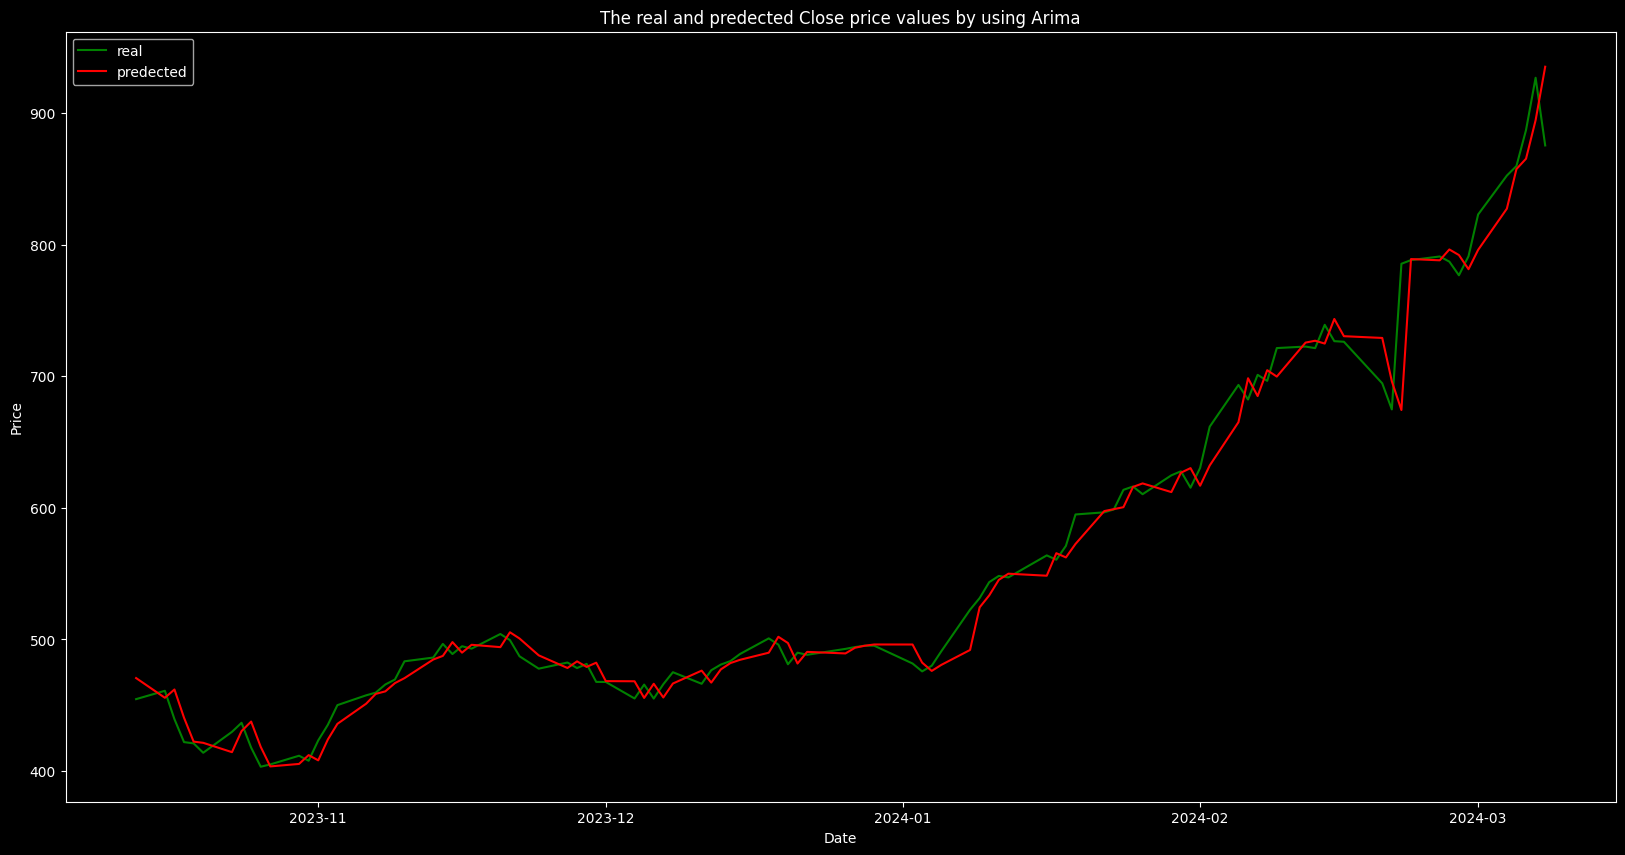

In [39]:
# Plotting the results

plt.figure(figsize=(20,10) , dpi = 100)
plt.plot(dataset.iloc[size:,:].index,test,label="real" , color = "green")
plt.plot(dataset.iloc[size:,:].index,predictions,label="predected" , color = "red")
plt.title("The real and predected Close price values by using Arima")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


*FOURIER TRANSFORM*

In [40]:
# Calculate the fourier transform
close_fft = np.fft.fft(np.asarray(dataset['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x:np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x:np.angle(x))


c:\Users\BUNICE\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\BUNICE\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


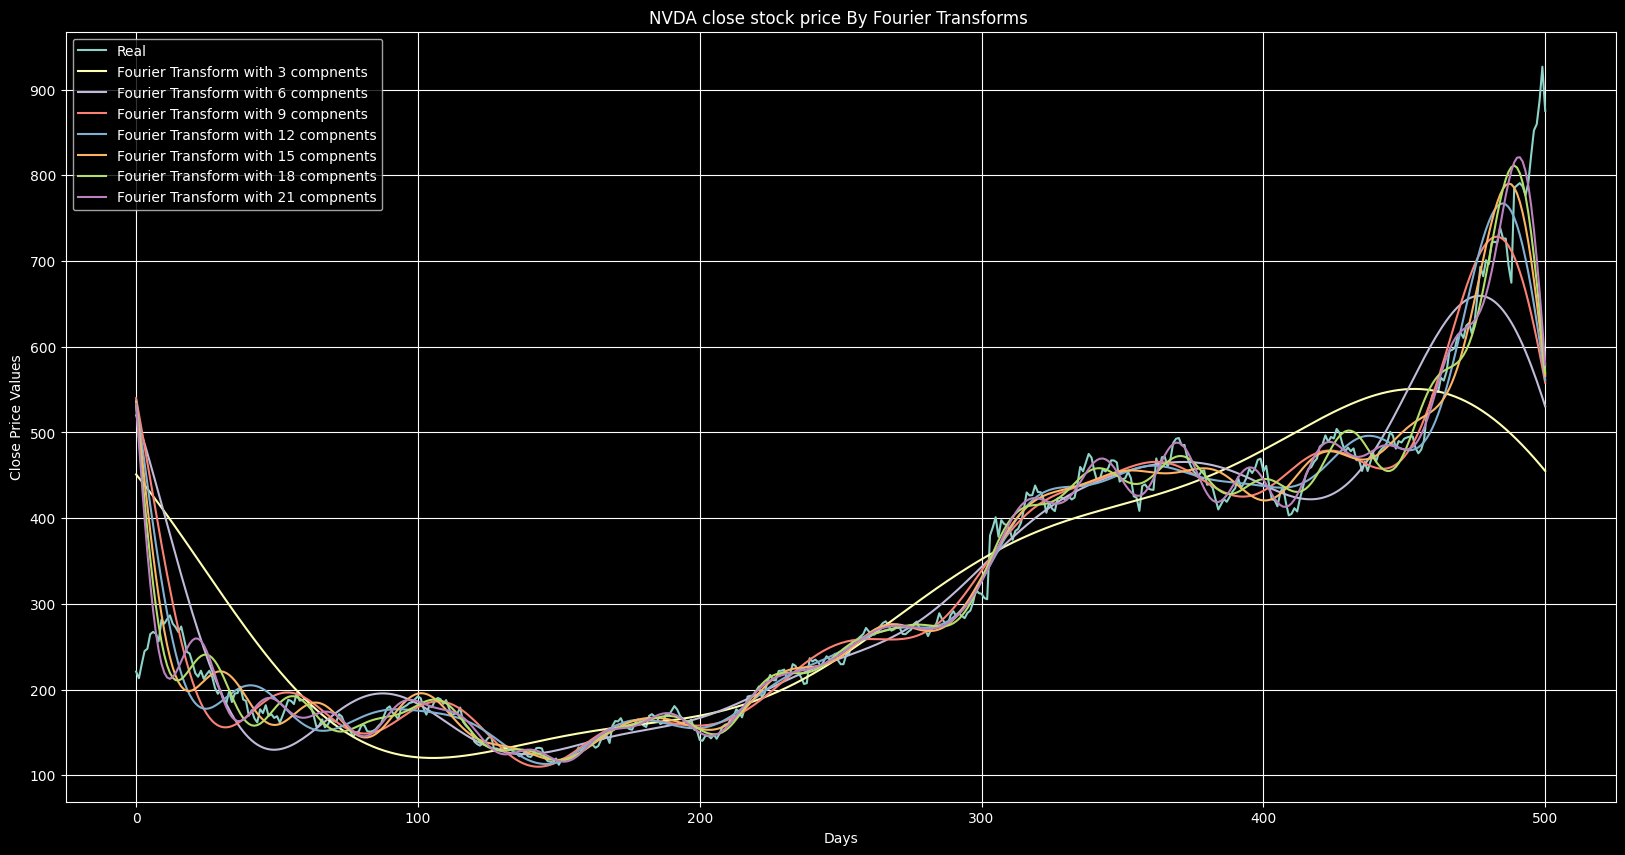

In [41]:
# Plotting the results

plt.figure(figsize=(20,10) , dpi  = 100)

plt.plot(np.asarray(dataset['Close'].tolist()) , label='Real')
for num in [3, 6, 9, 12, 15, 18, 21] :
    fft_list_m10 = np.copy(close_fft);fft_list_m10[num:-num] = 0
    plt.plot(np.fft.ifft(fft_list_m10) , label = 'Fourier Transform with {} compnents'.format(num))

plt.xlabel("Days")
plt.ylabel("Close Price Values")
plt.title('NVDA close stock price By Fourier Transforms ')
plt.legend()
plt.grid()
plt.show()

*Technical Indicators*

In [42]:
# Calculate ema 

def ema(Close, period) : 
    return Close.ewm(span=period , adjust=False).mean()


# Calculate RSI
def rsi(Close , period = 14) :
    delta = Close.diff()
    gain,loss = delta.copy() , delta.copy()
    gain[gain<0] = 0
    loss[loss>0] = 0
    avg_gain = gain.rolling(period).mean()
    avg_loss = abs(loss.rolling(period).mean())
    rs = avg_gain/avg_loss
    rsi = 100 - (100/(1+rs))
    return rsi


# Calculate MACD

def macd(Close, fast_period = 12 , slow_period = 26 , signal_period = 9) :
    fast_ema = Close.ewm(span=fast_period ,adjust = False).mean()
    slow_ema = Close.ewm(span=slow_period ,adjust = False).mean()
    macd_line = fast_ema - slow_ema
    signal_line = macd_line.ewm(span=signal_period ,adjust = False).mean()
    histogram = macd_line - signal_line
    return macd_line

In [43]:
dataset['ema_20'] = ema(dataset['Close'] , period=20)
dataset['ema_50'] = ema(dataset['Close'] , period=50)
dataset['ema_100'] = ema(dataset['Close'] , period=100)
dataset['rsi'] = rsi(dataset['Close'] , period=14)
dataset['macd'] = macd(dataset['Close'] , fast_period = 12 , slow_period = 26 , signal_period = 9)

In [44]:
# Create arima DF using predictions
arima_df = pd.DataFrame(history, index=dataset.index, columns=['ARIMA'])

# Set Fourier Transforms DF
fft_df.reset_index(inplace=True)
fft_df['index'] = pd.to_datetime(dataset.index)
fft_df.set_index('index' , inplace = True)
fft_df_real = pd.DataFrame(np.real(fft_df['fft']) , index=fft_df.index,columns = ["Fourier_real"])
fft_df_imag = pd.DataFrame(np.imag(fft_df['fft']) , index=fft_df.index,columns = ["Fourier_imag"])

# Technical Indicators DF
technical_indicators_df = dataset[['ema_20','ema_50','ema_100','rsi','macd','Close']]


# Merge DF
merged_df = pd.concat([arima_df, fft_df_real, fft_df_imag, technical_indicators_df], axis=1)
merged_df = merged_df.dropna()
merged_df

,ARIMA,Fourier_real,Fourier_imag,ema_20,ema_50,ema_100,rsi,macd,Close
2022-03-31,272.859985,-224.645221,3205.347791,256.591098,239.702480,231.322148,70.608804,15.219442,272.859985
2022-04-01,267.119995,462.205013,3104.941792,257.593850,240.777676,232.031016,71.726144,14.141253,267.119995
2022-04-04,273.600006,197.088359,3603.827937,259.118246,242.064826,232.854165,69.256437,13.652288,273.600006
2022-04-05,259.309998,-1569.237839,2955.933491,259.136508,242.741108,233.378042,56.351240,11.973671,259.309998
2022-04-06,244.070007,162.556291,1264.551158,257.701603,242.793221,233.589765,48.569836,9.306337,244.070007
...,...,...,...,...,...,...,...,...,...
2024-03-04,852.369995,3857.407017,-7782.378171,744.708910,657.744073,581.128658,72.438940,54.064552,852.369995
2024-03-05,859.640015,5918.626400,-13758.171608,755.654730,665.661561,586.643735,73.411165,56.633858,859.640015
2024-03-06,887.000000,10125.402297,-11315.538712,768.163803,674.341500,592.591384,74.251162,60.184010,887.000000
2024-03-07,926.690002,7538.505042,-9392.030018,783.261536,684.237520,599.207198,80.099871,65.445764,926.690002


In [45]:
# Separate in Train and Test Dfs

train_size = int(len(merged_df)*0.8)

train_df , test_df = merged_df.iloc[0:train_size], merged_df.iloc[train_size:len(merged_df)]

test_df

,ARIMA,Fourier_real,Fourier_imag,ema_20,ema_50,ema_100,rsi,macd,Close
2023-10-18,421.959991,-350.588520,-628.469858,446.469585,443.291798,418.086821,46.663171,0.287067,421.959991
2023-10-19,421.010010,-374.454704,-408.506687,444.044864,442.418002,418.144706,44.650246,-1.786054,421.010010
2023-10-20,413.869995,-193.019463,-632.221552,441.171067,441.298473,418.060058,36.416739,-3.959514,413.869995
2023-10-23,429.750000,-201.301886,-642.478551,440.083346,440.845591,418.291542,47.886111,-4.350464,429.750000
2023-10-24,436.630005,23.892951,-477.384427,439.754457,440.680274,418.654680,48.544363,-4.058353,436.630005
...,...,...,...,...,...,...,...,...,...
2024-03-04,852.369995,3857.407017,-7782.378171,744.708910,657.744073,581.128658,72.438940,54.064552,852.369995
2024-03-05,859.640015,5918.626400,-13758.171608,755.654730,665.661561,586.643735,73.411165,56.633858,859.640015
2024-03-06,887.000000,10125.402297,-11315.538712,768.163803,674.341500,592.591384,74.251162,60.184010,887.000000
2024-03-07,926.690002,7538.505042,-9392.030018,783.261536,684.237520,599.207198,80.099871,65.445764,926.690002


*Machine Learning*

In [46]:
#Scale the features
scalar = MinMaxScaler()
train_scaled = scalar.fit_transform(train_df.drop('Close',axis = 1))
test_scaled = scalar.fit_transform(test_df.drop('Close' , axis=1))


# Convert teh scaled data back to a dataFrame
train_scaled_df = pd.DataFrame(train_scaled,columns=train_df.columns[:-1], index=train_df.index)
test_scaled_df = pd.DataFrame(test_scaled,columns=test_df.columns[:-1] , index = test_df.index)


# Merge the scaled features with the target variable
train_scaled_df['Close'] = train_df['Close']
test_scaled_df['Close'] = test_df['Close']

#Split the scaled data into features and labes
X_train = train_scaled_df.iloc[:,:-1].values
y_train = train_scaled_df.iloc[:,-1].values
X_test = test_scaled_df.iloc[:,:-1].values
y_test = test_scaled_df.iloc[:,-1].values

In [47]:
#Define the model 
model = Sequential()
model.add(Dense(32,activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

#Compile the model
model.compile(optimizer='adam' , loss='mse')

# Train the model with early stopping callback

history = model.fit(X_train , y_train , epochs=1100 , batch_size = 32,
                    verbose = 1 , validation_data=(X_test,y_test) ,shuffle=False)

Epoch 1/1100
13/13 [==============================] - 2s 50ms/step - loss: 78436.3984 - val_loss: 335800.9688
Epoch 2/1100
13/13 [==============================] - 0s 16ms/step - loss: 78353.6719 - val_loss: 335603.9062
Epoch 3/1100
13/13 [==============================] - 0s 11ms/step - loss: 78259.8359 - val_loss: 335378.4375
Epoch 4/1100
13/13 [==============================] - 0s 12ms/step - loss: 78152.8750 - val_loss: 335108.1562
Epoch 5/1100
13/13 [==============================] - 0s 12ms/step - loss: 78025.9766 - val_loss: 334771.5000
Epoch 6/1100
13/13 [==============================] - 0s 13ms/step - loss: 77870.5859 - val_loss: 334336.4062
Epoch 7/1100
13/13 [==============================] - 0s 13ms/step - loss: 77668.2109 - val_loss: 333762.8438
Epoch 8/1100
13/13 [==============================] - 0s 8ms/step - loss: 77395.7812 - val_loss: 333015.2500
Epoch 9/1100
13/13 [==============================] - 0s 9ms/step - loss: 77044.8750 - val_loss: 332026.2188
Epoch 10/110

In [48]:
y_pred = model.predict(X_test)

#Calculate the test metrics
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

r2 = r2_score(y_test,y_pred)
evs = explained_variance_score(y_test, y_pred)

mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
mpe = np.mean((y_test-y_pred)/y_test)*100

print(f"Mean squared Error (MSE): {mse}")
print(f"Mean absolute Error (MAE): {mae}")
print(f"R2 score: {r2}")
print(f"Explained variance score (EVS): {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

4/4 [==============================] - 0s 5ms/step
Mean squared Error (MSE): 120666.79878245009
Mean absolute Error (MAE): 346.65658654972
R2 score: -5.869065327528721
Explained variance score (EVS): 0.9717641998894903
Mean Absolute Percentage Error (MAPE): 59.86052366294806
Mean Percentage Error (MPE): 59.53097445769286


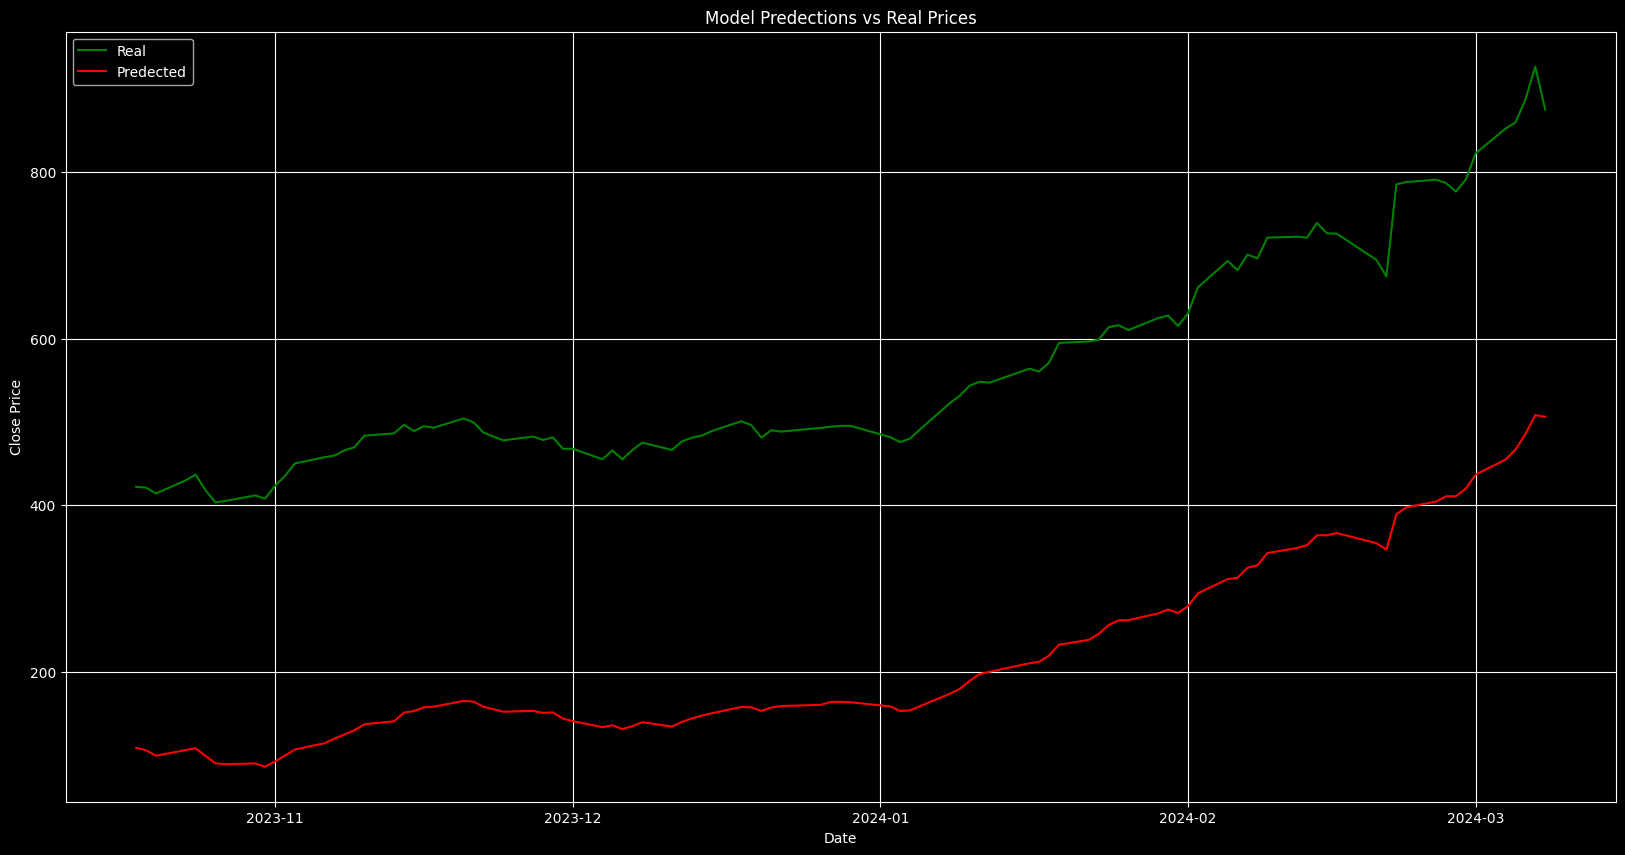

In [50]:
# Plot Final Predections 

plt.figure(figsize=(20,10),dpi=100)
plt.plot(test_scaled_df.index , y_test , label = 'Real' , color = 'green')
plt.plot(test_scaled_df.index , y_pred , label = 'Predected' , color = 'red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Model Predections vs Real Prices')
plt.legend()
plt.grid()
plt.show()